# Code...

In [1]:
# importing all necessary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
# importing data
df = pd.read_json('livedata.json')
df

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273
...,...,...,...,...
95,Judy,2020-07-04 16:35:30,13.176481,77.619396
96,Bob,2020-07-04 15:35:30,13.172339,77.662080
97,Grace,2020-07-04 23:35:30,13.115079,77.697991
98,Bob,2020-07-04 19:35:30,13.180751,77.704404


In [3]:
# checking for null values in data
df.isnull().sum()

id           0
timestamp    0
latitude     0
longitude    0
dtype: int64

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


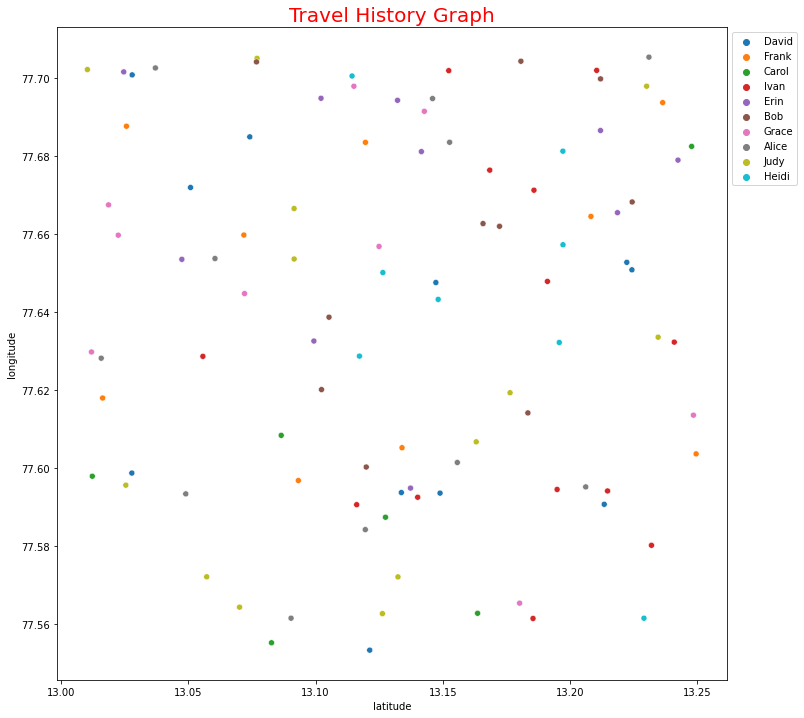

In [4]:
# plotting the graph using latitude and longitude values 
plt.figure(figsize=(12,12))
sns.scatterplot(df['latitude'], df['longitude'], hue=[x for x in df['id']])
plt.legend(bbox_to_anchor = [1, 1])
plt.title('Travel History Graph', {'fontsize': 20, 'color':'red'})
plt.savefig('Travel History Graph')
plt.show();

In [5]:
# applying DBSCAN algorithm to find peoples who came in contact with each other 
from sklearn.cluster import DBSCAN
def get_infected_name(input_name):
    # 6 feet to kilometers
    epsilon =0.0018288 
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()
    cluster_id_lst = df['cluster'].unique()
        
    # appending all the infected peoples who came in contact with patient.
    infected = []
    for i in cluster_id_lst:
        if i!=-1:
            f = df[df['cluster']==i]
            names = list(f.iloc[:,0])
            for j in names:
                if j not in infected:
                    if j!=input_name:
                        infected.append(j)
    if len(infected)==0:
        print('No one came in contact with the patient.')
    elif len(infected)==1:
        print("%s had come in contact with the patient."%infected[0])
    else:
        print("The following people came in contact with the patient:- \n",infected)

get_infected_name('Bob')

Judy had come in contact with the patient.


In [6]:
# Manually cross-checking above solution
z = df[df['cluster']==0] # cluster-0 peoples
z  

,id,timestamp,latitude,longitude,cluster
45,Judy,2020-07-04 15:35:30,13.077005,77.705144,0
89,Bob,2020-07-04 15:35:30,13.076776,77.704233,0


- `In the above output, we can see that only 2 people in this cluster so when we have given Bob as patent our program has given Judy as an infected person`

In [14]:
# Distance b/w this two peoples in km
lat =  z.iloc[0,2]-z.iloc[1,2]   
long = z.iloc[0,3]-z.iloc[1,3]
dist = np.sqrt((lat*lat)+(long*long))
print(dist, "km")

0.0009398505519500778 km


- `This distance is less than 6 feet (0.0018288 km). So our program is perfect.`

### Thank You!